In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import os

2022-10-01 15:39:45.597226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-01 15:39:46.002258: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-01 15:39:46.879295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/can/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64:
2022-10-01 15:39:46.879399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not

In [12]:
BASE_PATH = '../gtsrb/'
TRAIN_PATH = BASE_PATH + 'Train'


data = []
labels = []

NUM_CLASSES = len(os.listdir(TRAIN_PATH))
IMG_HEIGHT = 48
IMG_WIDTH = 48
IMG_CHAN = 3
print("#classes: "+str(NUM_CLASSES))
img_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHAN)

NUM_CATEGORIES = len(os.listdir(TRAIN_PATH))
print("#categories: "+str(NUM_CATEGORIES))
for category in range(NUM_CLASSES):
        each_class = 0
        categories = os.path.join(TRAIN_PATH, str(category))
        for img in os.listdir(categories):
            image = Image.open(os.path.join(categories, img))
            image = image.resize((IMG_HEIGHT,IMG_WIDTH))
            image = np.array(image)
            image = image/255.0
            data.append(image)
            each_class +=1
        print("category"+str(category)+" has: " + str(each_class))

#classes: 43
#categories: 43
category0 has: 210
category1 has: 2220
category2 has: 2250
category3 has: 1410
category4 has: 1980
category5 has: 1860
category6 has: 420
category7 has: 1440
category8 has: 1410
category9 has: 1470
category10 has: 2010
category11 has: 1320
category12 has: 2100
category13 has: 2160
category14 has: 780
category15 has: 630
category16 has: 420
category17 has: 1110
category18 has: 1200
category19 has: 210
category20 has: 360
category21 has: 330
category22 has: 390
category23 has: 510
category24 has: 270
category25 has: 1500
category26 has: 600
category27 has: 240
category28 has: 540
category29 has: 270
category30 has: 450
category31 has: 780
category32 has: 240
category33 has: 689
category34 has: 420
category35 has: 1200
category36 has: 390
category37 has: 210
category38 has: 2070
category39 has: 300
category40 has: 360
category41 has: 240
category42 has: 240


In [3]:
# Convert lists to NumPy arrays
data = np.array(data)

In [4]:
img_train, img_val = train_test_split(data,test_size=0.2, random_state=16)
print(img_train.shape, img_val.shape)

(31367, 48, 48, 3) (7842, 48, 48, 3)


In [5]:
ae = tf.keras.models.Sequential()
ae.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=img_shape))
ae.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
ae.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
ae.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
ae.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
ae.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
ae.add(tf.keras.layers.Flatten())
ae.add(tf.keras.layers.Dense(1024, activation='relu'))
ae.add(tf.keras.layers.Dense(256, activation='relu'))
ae.add(tf.keras.layers.Dense(1024, activation='relu'))
ae.add(tf.keras.layers.Dense(5184, activation='relu'))
ae.add(tf.keras.layers.Reshape((9, 9, 64)))
ae.add(tf.keras.layers.UpSampling2D(size=(2, 2)))
ae.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), activation='relu'))
ae.add(tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), activation='relu'))
ae.add(tf.keras.layers.UpSampling2D(size=(2, 2)))
ae.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3), activation='relu'))
ae.add(tf.keras.layers.Conv2DTranspose(filters=3, kernel_size = (3,3), activation = 'relu'))
ae.summary()

2022-09-29 17:23:17.156676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 17:23:17.162179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/can/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64:
2022-09-29 17:23:17.162197: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-29 17:23:17.163201: I tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                    

In [6]:
ae.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

history = ae.fit(img_train, img_train, batch_size=64, epochs=50, validation_data=(img_val, img_val))

Epoch 1/50
491/491 [==============================] - 160s 325ms/step - loss: 0.0331 - accuracy: 0.5101 - val_loss: 0.0161 - val_accuracy: 0.5983
Epoch 2/50
491/491 [==============================] - 164s 335ms/step - loss: 0.0130 - accuracy: 0.6332 - val_loss: 0.0124 - val_accuracy: 0.6440
Epoch 3/50
491/491 [==============================] - 166s 337ms/step - loss: 0.0104 - accuracy: 0.6593 - val_loss: 0.0095 - val_accuracy: 0.6789
Epoch 4/50
491/491 [==============================] - 166s 337ms/step - loss: 0.0091 - accuracy: 0.6862 - val_loss: 0.0086 - val_accuracy: 0.7017
Epoch 5/50
491/491 [==============================] - 166s 338ms/step - loss: 0.0080 - accuracy: 0.7066 - val_loss: 0.0093 - val_accuracy: 0.6989
Epoch 6/50
491/491 [==============================] - 166s 339ms/step - loss: 0.0080 - accuracy: 0.6964 - val_loss: 0.0079 - val_accuracy: 0.7230
Epoch 7/50
491/491 [==============================] - 167s 339ms/step - loss: 0.0076 - accuracy: 0.7117 - val_loss: 0.0069 -

In [9]:
ae.save("autoencoder_v1.h5")

In [10]:
test_data = []
TEST_PATH = BASE_PATH + 'damaged_noentry/web_imgs/'

#y_test = pd.read_csv(BASE_PATH+'Test.csv')

#labels = y_test["ClassId"].values
#imgs = y_test["Path"].values


for img in imgs:
    image = Image.open(os.path.join(BASE_PATH+img))
    image = image.resize((IMG_HEIGHT,IMG_WIDTH))
    image = np.array(image)
    image = image/255.0
    test_data.append(image)

test_data = np.array(test_data)            
gen = ae.predict(test_data)

395/395 [==============================] - 16s 40ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


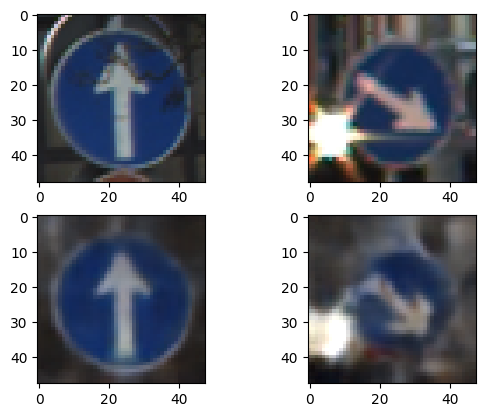

12630


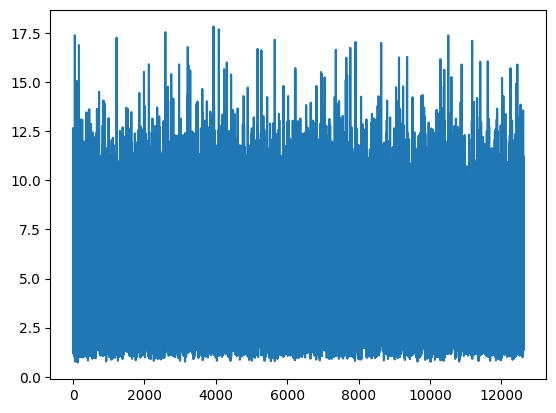

In [16]:
plt.subplot(2,2,1)
plt.imshow(test_data[9])
plt.subplot(2,2,3)
plt.imshow(gen[9])
plt.subplot(2,2,2)
plt.imshow(test_data[19])
plt.subplot(2,2,4)
plt.imshow(gen[19])
plt.show()



def img_rmse(image1, image2):
    error = np.sqrt(np.sum((image1.astype('float')-image2.astype('float'))**2))
  #error /= image1.shape[0] * image1.shape[1]
    return error


rmse = []
print(len(gen))
for i in range(len(gen)):
    rmse.append(img_rmse(test_data[i], gen[i]))
    
plt.plot(rmse)
plt.show()